In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the Titanic dataset 
titanic_data = pd.read_csv('data/train.csv')

C:\Users\HARMAIN\AppData\Local\Temp\ipykernel_8616\2134998508.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="YlGnBu")


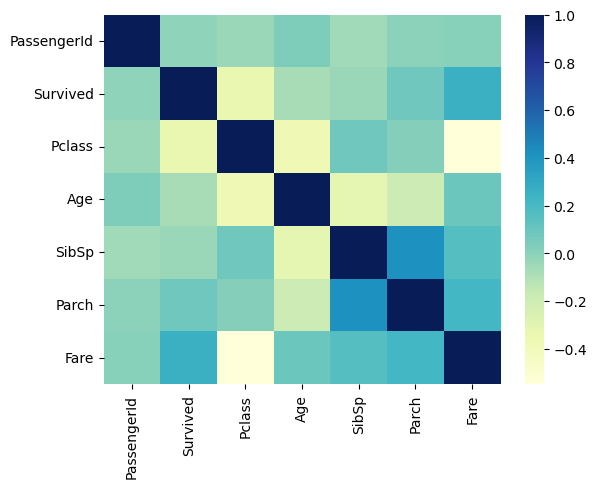

In [6]:
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

Accuracy: 0.8100558659217877
Confusion Matrix:
[[91 14]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Feature Importance:
Pclass   -0.864906
Age      -0.335392
Sex       1.212946
dtype: float64


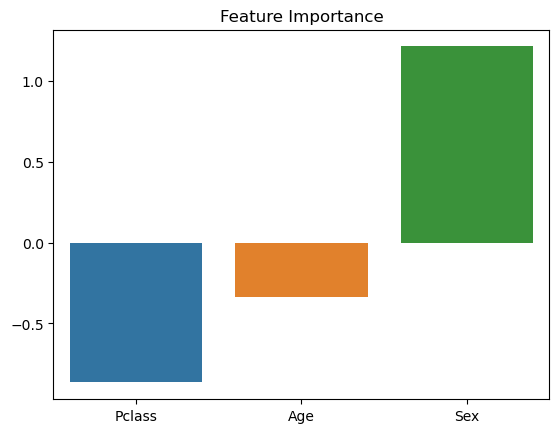

In [12]:
 df = pd.read_csv('data/train.csv')
    
 # Drop irrelevant columns and handle missing values
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Convert 'Sex' to numerical (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# We'll assume that 'Pclass', 'Age', and 'Sex' are the important features. Adjust as needed.
selected_features = ['Pclass', 'Age', 'Sex']
X = df[selected_features]
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model (you can try other classifiers as well)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance from logistic regression coefficients
feature_importance = pd.Series(model.coef_[0], index=selected_features)
print("Feature Importance:")
print(feature_importance)

# Visualization of feature importance
sns.barplot(x=feature_importance.index, y=feature_importance.values)
plt.title("Feature Importance")
plt.show()
